# 1. Getting images ready

In [262]:
import os
from pathlib import Path

DATA_PATH = Path("data")

# os.environ['KAGGLE_USERNAME'] = "ayyoshii" # username from the json file
# os.environ['KAGGLE_KEY'] = "b3760545daa9bcd03300ec0b08bd2c27" # key from the json file

# import kaggle

# kaggle.api.dataset_download_files('truthisneverlinear/pokemon-generations-image-dataset/2', path=DATA_PATH, unzip=False)
# # kaggle.api.dataset_download_files('The_name_of_the_dataset', path='the_path_you_want_to_download_the_files_to', unzip=True)

In [263]:
# import zipfile
# with zipfile.ZipFile(DATA_PATH / "pokemon-generations-image-dataset.zip", "r") as zip_ref:
#     zip_ref.extractall(DATA_PATH)

In [690]:
IMAGES_PATH = DATA_PATH / "pokemon"

In [691]:
def dir_walkthrough(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

dir_walkthrough(IMAGES_PATH)

There are 5 directories and 0 images in data\pokemon.
There are 0 directories and 202 images in data\pokemon\conquest.
There are 3 directories and 942 images in data\pokemon\icons.
There are 0 directories and 5 images in data\pokemon\icons\female.
There are 1 directories and 737 images in data\pokemon\icons\old.
There are 0 directories and 3 images in data\pokemon\icons\old\female.
There are 0 directories and 80 images in data\pokemon\icons\right.
There are 13 directories and 0 images in data\pokemon\main-sprites.
There are 3 directories and 754 images in data\pokemon\main-sprites\black-white.
There are 2 directories and 754 images in data\pokemon\main-sprites\black-white\back.
There are 0 directories and 88 images in data\pokemon\main-sprites\black-white\back\female.
There are 1 directories and 753 images in data\pokemon\main-sprites\black-white\back\shiny.
There are 0 directories and 88 images in data\pokemon\main-sprites\black-white\back\shiny\female.
There are 0 directories and 93 

Path: data\pokemon\conquest\391.png
Image size: 128 x 128
Image id: 391


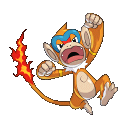

In [692]:
import random
from PIL import Image

# get all image paths
conquest_path_list = list(IMAGES_PATH.glob("conquest/*.png")) 

# random image path
random_image_path = random.choice(conquest_path_list) 

# image class
image_class = random_image_path.name.split('.')[0]

# Get image
img = Image.open(random_image_path) 
print(f"Path: {random_image_path}")
print(f"Image size: {img.height} x {img.width}")
print(f"Image id: {image_class}")
img

# 2. Getting classes ready

In [693]:
import pandas as pd

pokemon_data = pd.read_csv(DATA_PATH / 'Pokemon.txt')
pokemon_data = pokemon_data.drop_duplicates(subset=["#"],keep="first")
pokemon_data = pokemon_data.set_index(["#"], drop=True)
# pokemon_data.iloc[int(image_class)-1]["Name"]
pokemon_data["Name"].unique()


array(['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon',
       'Charizard', 'Squirtle', 'Wartortle', 'Blastoise', 'Caterpie',
       'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill', 'Pidgey',
       'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow',
       'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash',
       'Nidoran♀', 'Nidorina', 'Nidoqueen', 'Nidoran♂', 'Nidorino',
       'Nidoking', 'Clefairy', 'Clefable', 'Vulpix', 'Ninetales',
       'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat', 'Oddish', 'Gloom',
       'Vileplume', 'Paras', 'Parasect', 'Venonat', 'Venomoth', 'Diglett',
       'Dugtrio', 'Meowth', 'Persian', 'Psyduck', 'Golduck', 'Mankey',
       'Primeape', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl',
       'Poliwrath', 'Abra', 'Kadabra', 'Alakazam', 'Machop', 'Machoke',
       'Machamp', 'Bellsprout', 'Weepinbell', 'Victreebel', 'Tentacool',
       'Tentacruel', 'Geodude', 'Graveler', 'Golem', 'Ponyta', 'Rapidash

In [694]:
def get_classes(df: pd.DataFrame):
    classes = df["Name"].unique()
    classes_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, classes_to_idx

In [695]:
classes, classes_to_idx = get_classes(pokemon_data)
classes_to_idx

{'Bulbasaur': 0,
 'Ivysaur': 1,
 'Venusaur': 2,
 'Charmander': 3,
 'Charmeleon': 4,
 'Charizard': 5,
 'Squirtle': 6,
 'Wartortle': 7,
 'Blastoise': 8,
 'Caterpie': 9,
 'Metapod': 10,
 'Butterfree': 11,
 'Weedle': 12,
 'Kakuna': 13,
 'Beedrill': 14,
 'Pidgey': 15,
 'Pidgeotto': 16,
 'Pidgeot': 17,
 'Rattata': 18,
 'Raticate': 19,
 'Spearow': 20,
 'Fearow': 21,
 'Ekans': 22,
 'Arbok': 23,
 'Pikachu': 24,
 'Raichu': 25,
 'Sandshrew': 26,
 'Sandslash': 27,
 'Nidoran♀': 28,
 'Nidorina': 29,
 'Nidoqueen': 30,
 'Nidoran♂': 31,
 'Nidorino': 32,
 'Nidoking': 33,
 'Clefairy': 34,
 'Clefable': 35,
 'Vulpix': 36,
 'Ninetales': 37,
 'Jigglypuff': 38,
 'Wigglytuff': 39,
 'Zubat': 40,
 'Golbat': 41,
 'Oddish': 42,
 'Gloom': 43,
 'Vileplume': 44,
 'Paras': 45,
 'Parasect': 46,
 'Venonat': 47,
 'Venomoth': 48,
 'Diglett': 49,
 'Dugtrio': 50,
 'Meowth': 51,
 'Persian': 52,
 'Psyduck': 53,
 'Golduck': 54,
 'Mankey': 55,
 'Primeape': 56,
 'Growlithe': 57,
 'Arcanine': 58,
 'Poliwag': 59,
 'Poliwhirl': 60,

# 3. Preparing Data

In [851]:
from torch.utils.data import Dataset
from typing import Tuple, Dict, List
import torch
import re

class PokemonData(Dataset):
    def __init__(self,
                 targ_dir: str,
                 classes_df: pd.DataFrame,
                 transform=None):
        super().__init__()
        self.paths = list(Path(targ_dir).glob('*.png'))
        self.transform = transform
        self.classes, self.classes_to_idx = get_classes(classes_df)
        
    def load_image(self, index: int) -> Tuple[torch.Tensor, int]:
        image_path = self.paths[index]
        image = Image.open(image_path).convert("RGBA")
        return Image.composite(image, Image.new('RGBA', image.size, 'white'), image).convert("RGB")
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        img_name = self.paths[index].name.split('.')[0]
        img_name = int(re.findall("\d+", img_name)[0])
        class_name = self.classes[img_name]
        class_idx = self.classes_to_idx[class_name]
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [855]:
from torchvision.transforms import v2

image_transformer = v2.Compose([
    v2.ToImage(),
    # v2.ToDtype(torch.uint8, scale=True),
    v2.Resize(size=(64,64)),
    v2.ToDtype(torch.float32, scale=True)
])

In [856]:
tranformed = image_transformer(img)
tranformed.shape

AttributeError: 'int' object has no attribute 'shape'

In [857]:
tranformed[:, :, 32]

TypeError: 'int' object is not subscriptable

In [858]:
conquest_data = PokemonData(targ_dir=IMAGES_PATH / "conquest",
                            transform=image_transformer,
                            classes_df=pokemon_data)

In [859]:
import matplotlib.pyplot as plt

In [860]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    n = min(n, 10)
    
    if seed:
        random.seed(seed)
    
    random_samples_idx = random.sample(range(len(dataset)), k=n) # random indices from range (0, len(dataset))
    
    plt.figure(figsize=(16, 8))
    
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    
        targ_image_adjust = targ_image.permute(1, 2, 0) # H, W, C
        
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis(False)
        if classes.any():
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
            plt.title(title)

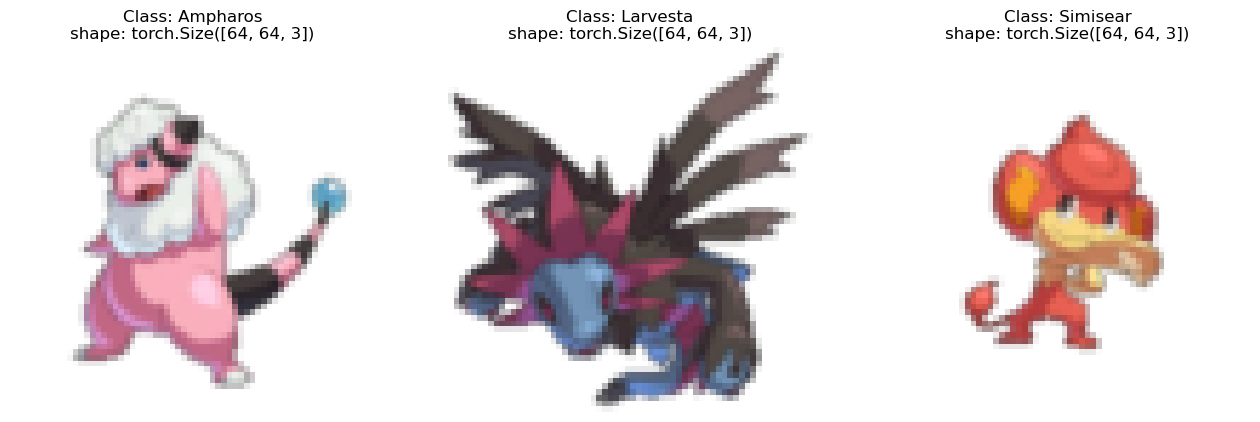

In [867]:
display_random_images(dataset=conquest_data,
                      classes=conquest_data.classes,
                      n=3)

In [868]:
# in dataloaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = 0

conquest_dataloader = DataLoader(dataset=conquest_data,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

# 3. Model creation

In [869]:
from torch import nn

class Discriminator(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int = 800):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.Sigmoid()
        )
        
    def forward(self, x: torch.Tensor):
        return self.layers(x)

In [870]:
class Generator(nn.Module):
    def __init__(self, input_shape: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(input_shape, 1024),
            nn.ReLU(),
            nn.Linear(1024, 2048),
            nn.ReLU(),
            nn.Linear(2048, output_shape),
            nn.Tanh()
        )
        
    def forward(self, x):
        x = self.layer_stack(x)
        return (x.view(-1, 3, 64, 64))

In [871]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [872]:
D = Discriminator(input_shape=64*64*3,
                  output_shape=1,
                  hidden_units=512).to(device)

G = Generator(input_shape=128,
              output_shape=64*64*3).to(device)

In [873]:
loss = nn.BCELoss()

G_optimizer = torch.optim.Adam(G.parameters(), lr=2e-4, betas=(0.5, 0.999))
D_optimizer = torch.optim.Adam(D.parameters(), lr=2e-4, betas=(0.5, 0.999))

In [883]:
from tqdm.auto import tqdm

epochs = 1000

for epoch in tqdm(range(epochs)):
    for idx, (imgs, _) in enumerate(conquest_dataloader):
        idx += 1
        # Обучаем дискриминатор
        # real_inputs - изображения из набора данных MNIST 
        # fake_inputs - изображения от генератора
        # real_inputs должны быть классифицированы как 1, а fake_inputs - как 0
        real_inputs = imgs.to(device)
        real_outputs = D(real_inputs)
        
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)
        
        noise = (torch.rand(real_inputs.shape[0], 128) - 0.5) / 0.5
        
        noise = noise.to(device)
        
        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)
        
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)
        
        outputs = torch.cat((real_outputs, fake_outputs), 0)
        targets = torch.cat((real_label, fake_label), 0)
        
        D_loss = loss(outputs, targets)
        D_optimizer.zero_grad()
        
        D_loss.backward()
        D_optimizer.step()
        
        # Обучаем генератор
        # Цель генератора получить от дискриминатора 1 по всем изображениям
        noise = (torch.rand(real_inputs.shape[0], 128)-0.5)/0.5
        noise = noise.to(device)
        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)
        fake_targets = torch.ones([fake_inputs.shape[0], 1]).to(device)
        G_loss = loss(fake_outputs, fake_targets)
        G_optimizer.zero_grad()
        G_loss.backward()
        G_optimizer.step()
        if idx % 100 == 0 or idx == len(conquest_dataloader):
            print('Epoch {} Iteration {}: discriminator_loss {:.3f} generator_loss {:.3f}'.format(epoch, idx, D_loss.item(), G_loss.item()))

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 0 Iteration 7: discriminator_loss 0.673 generator_loss 0.750
Epoch 1 Iteration 7: discriminator_loss 0.639 generator_loss 1.029
Epoch 2 Iteration 7: discriminator_loss 0.561 generator_loss 0.955
Epoch 3 Iteration 7: discriminator_loss 0.705 generator_loss 0.883
Epoch 4 Iteration 7: discriminator_loss 0.806 generator_loss 0.602
Epoch 5 Iteration 7: discriminator_loss 0.783 generator_loss 0.838
Epoch 6 Iteration 7: discriminator_loss 0.582 generator_loss 0.983
Epoch 7 Iteration 7: discriminator_loss 0.702 generator_loss 1.076
Epoch 8 Iteration 7: discriminator_loss 0.742 generator_loss 0.934
Epoch 9 Iteration 7: discriminator_loss 0.736 generator_loss 0.863
Epoch 10 Iteration 7: discriminator_loss 0.776 generator_loss 0.719
Epoch 11 Iteration 7: discriminator_loss 0.691 generator_loss 0.884
Epoch 12 Iteration 7: discriminator_loss 0.607 generator_loss 0.928
Epoch 13 Iteration 7: discriminator_loss 0.509 generator_loss 1.272
Epoch 14 Iteration 7: discriminator_loss 0.490 generator_l

tensor([[ 0.1778, -0.5411,  0.9718,  ...,  0.4103,  0.9113,  0.4049],
        [ 0.4251,  0.6677, -0.6849,  ...,  0.5331,  0.2174, -0.7008],
        [ 0.1179, -0.3011,  0.6835,  ...,  0.5964, -0.0141, -0.2520],
        ...,
        [ 0.9999, -0.2168,  0.9191,  ...,  0.4819,  0.3682,  0.3996],
        [-0.9490, -0.5135,  0.8181,  ...,  0.8616,  0.8563,  0.8982],
        [-0.6734,  0.6164, -0.8861,  ..., -0.6585,  0.6934, -0.3069]])
tensor([[[[0.9986, 0.9981, 0.9976,  ..., 0.9977, 0.9977, 0.9978],
          [0.9986, 0.9986, 0.9979,  ..., 0.9962, 0.9968, 0.9969],
          [0.9978, 0.9989, 0.9982,  ..., 0.9967, 0.9951, 0.9986],
          ...,
          [0.9975, 0.9984, 0.9978,  ..., 0.9985, 0.9970, 0.9981],
          [0.9983, 0.9972, 0.9951,  ..., 0.9975, 0.9977, 0.9963],
          [0.9986, 0.9981, 0.9983,  ..., 0.9978, 0.9984, 0.9988]],

         [[0.9988, 0.9981, 0.9987,  ..., 0.9969, 0.9979, 0.9970],
          [0.9984, 0.9980, 0.9984,  ..., 0.9965, 0.9916, 0.9953],
          [0.9982, 0.

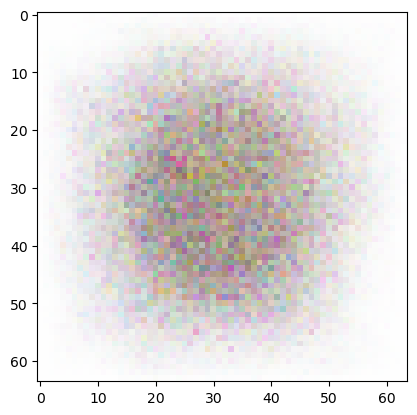

In [884]:
G.eval()
with torch.inference_mode():
    noise = (torch.rand(real_inputs.shape[0], 128) - 0.5) / 0.5
    print(noise)
    noise = noise.to(device)
    fake_inputs = G(noise)
    print(fake_inputs)
    plt.imshow(fake_inputs[0].cpu().permute(1, 2, 0))

In [885]:
classes, _ = get_classes(pokemon_data)
len(classes)

721

# 4. Gan 2.0

In [922]:
# Number of workers for dataloader
workers = 2
# Batch size during training
batch_size = 128
# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64
# Number of channels in the training images. For color images this is 3
nc = 3
# Size of z latent vector (i.e. size of generator input)
nz = 100
# Size of feature maps in generator
ngf = 64
# Size of feature maps in discriminator
ndf = 64
# Number of training epochs
num_epochs = 1000
# Learning rate for optimizers
lr = 0.0002
# Beta1 hyperparam for Adam optimizers
beta1 = 0.5
# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [930]:
import torch
import torch.nn as nn

"""
Network Architectures
The following are the discriminator and generator architectures
"""
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
        
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.Dropout(p=0.3),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [931]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
# from model import discriminator, generator
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import glob
import cv2
import torchvision
avgpool = nn.AdaptiveAvgPool2d((64, 64))
from PIL import Image

In [936]:
# Create the generator
netG = Generator(ngpu).to(device)

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.02.
netG.apply(weights_init)

# Print the model
print(netG)

netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)
     

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Dropout(p=0.3, inplace=False)
    (7): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1,

In [937]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [938]:
img, label = next(enumerate(conquest_dataloader))

In [939]:
for epoch in range(num_epochs):
    for idx, (imgs, label) in enumerate(conquest_dataloader):
        idx += 1

        # Training the discriminator
        # Real inputs are actual images of the MNIST dataset
        # Fake inputs are from the generator
        # Real inputs should be classified as 1 and fake as 0
        real_inputs = imgs.to(device)
        real_outputs = netD(real_inputs)
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)
        
        noise = (torch.rand(real_inputs.shape[0], nz, 1, 1) - 0.5) / 0.5
        # noise = torch.zeros(real_inputs.shape[0], nz, 1, 1)
        # # noise[int(label.item())] += 1
        
        # for i, item in enumerate(label):
        #         noise[i, label] += 1
        
        noise = noise.to(device)
#         print(noise.shape)
        fake_inputs = netG(noise)
        fake_outputs = netD(fake_inputs)
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)

        outputs = torch.cat((real_outputs.view(-1).unsqueeze(1), fake_outputs.view(-1).unsqueeze(1)), 0)
        targets = torch.cat((real_label, fake_label), 0)

        D_loss = loss(outputs, targets)
        optimizerD.zero_grad()
        D_loss.backward()
        optimizerD.step()

        # Training the generator
        # For generator, goal is to make the discriminator believe everything is 1
        noise = (torch.rand(real_inputs.shape[0], nz, 1, 1)-0.5)/0.5
        # noise = torch.zeros(real_inputs.shape[0], nz, 1, 1)
        # # noise[int(label.item())] += 1
        
        # for i, item in enumerate(label):
        #         noise[i, label] += 1
                
        noise = noise.to(device)
#         print(noise.shape)
        fake_inputs = netG(noise)
        fake_outputs = netD(fake_inputs)
        fake_targets = torch.ones([fake_inputs.shape[0], 1]).to(device)
        G_loss = loss(fake_outputs.view(-1).unsqueeze(1), fake_targets)
        optimizerG.zero_grad()
        G_loss.backward()
        optimizerG.step()

        if idx % 5 == 0 or idx == len(conquest_dataloader):
            print('Epoch {} Iteration {}: discriminator_loss {:.3f} generator_loss {:.3f}'.format(epoch, idx, D_loss.item(), G_loss.item()))

        # if (epoch+1) % 10 == 0:
        #         torch.save(G, 'Generator_epoch_{}.pth'.format(epoch))
        #         print('Model saved.')

Epoch 0 Iteration 5: discriminator_loss 0.064 generator_loss 4.774
Epoch 0 Iteration 7: discriminator_loss 0.095 generator_loss 4.701
Epoch 1 Iteration 5: discriminator_loss 0.030 generator_loss 7.094
Epoch 1 Iteration 7: discriminator_loss 0.054 generator_loss 7.106
Epoch 2 Iteration 5: discriminator_loss 0.017 generator_loss 6.522
Epoch 2 Iteration 7: discriminator_loss 0.011 generator_loss 8.143
Epoch 3 Iteration 5: discriminator_loss 0.019 generator_loss 8.479
Epoch 3 Iteration 7: discriminator_loss 0.053 generator_loss 13.589
Epoch 4 Iteration 5: discriminator_loss 0.054 generator_loss 3.107
Epoch 4 Iteration 7: discriminator_loss 0.028 generator_loss 28.493
Epoch 5 Iteration 5: discriminator_loss 0.639 generator_loss 7.832
Epoch 5 Iteration 7: discriminator_loss 0.002 generator_loss 12.586
Epoch 6 Iteration 5: discriminator_loss 0.561 generator_loss 17.949
Epoch 6 Iteration 7: discriminator_loss 0.754 generator_loss 6.249
Epoch 7 Iteration 5: discriminator_loss 1.484 generator_lo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


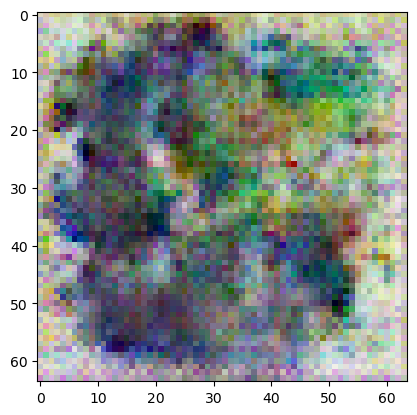

In [972]:
netG.eval()
with torch.inference_mode():
    noise = (torch.rand(real_inputs.shape[0], 100, 1, 1) - 0.5) / 0.5
    output = netG(noise.to(device))
    plt.imshow(output[0].permute(1, 2, 0).detach().cpu())

In [1]:
import src

In [3]:
dir(src)

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [4]:
src.data.data.download_dataset()

AttributeError: module 'src' has no attribute 'data'